In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [16]:
data = pd.read_csv("data/lab8/data.csv",index_col="№")
data.head()

,yi,xi,пол
№,,,
1,338,35,муж.
2,323,55,жен.
3,299,32,жен.
4,334,44,муж.
5,305,33,жен.


Преобразуем пол в переменную

In [17]:
data["пол"] = LabelEncoder().fit_transform(data["пол"])
data.head()

,yi,xi,пол
№,,,
1,338,35,1
2,323,55,0
3,299,32,0
4,334,44,1
5,305,33,0


### 1. Составить модель множественной регрессии  изменения зависимой переменной yi от предиктора xi при учете пола рабочих с помощью фиктивной переменной, взяв женский пол в качестве эталонной категории.

In [26]:
X = data.drop(columns="yi")
X["free"] = 1
y=data["yi"]

In [27]:
lig_reg = LinearRegression()
lig_reg = lig_reg.fit(X=X,y=y)
lig_reg.coef_

array([ 1.08888666, 26.49721916,  0.        ])

Уравнение линейной регрессии : y=1.08888666x+26.49721916*пол+0

### 2. Построить выборочное уравнение линейной множественной регрессии, с доверительной вероятностью 0,95% оценить значимость его коэффициентов и уравнения регрессии в целом.

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


df = pd.DataFrame(data)

# Строим модель линейной регрессии
model = ols('yi ~ xi + пол', data=df).fit()

# Выводим результаты регрессионного анализа
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     yi   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     69.90
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           1.11e-07
Time:                        16:00:00   Log-Likelihood:                -47.831
No. Observations:                  16   AIC:                             101.7
Df Residuals:                      13   BIC:                             104.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    263.0223      7.018     37.478      0.0

/home/ivan/ЧелГУ/Анализ данных/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


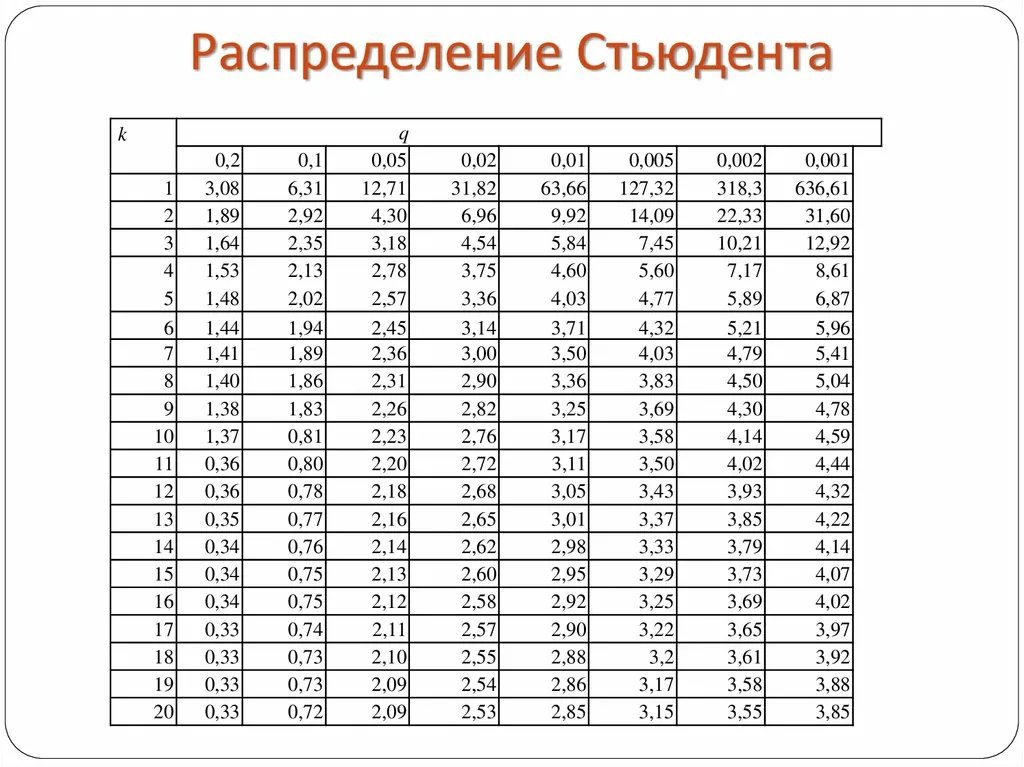
t(tabl)=2.16 

Так как для обоих коэф расчетнное значекние больше табличного, то они значимые.
R^2=0.915

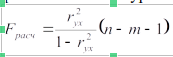

Табличное значение распредедения Фишера = 3,8 при k1=2,k2=13 и уровне значимости 0,05 

In [32]:
F = 0.915*(16-2-1)/(1-0.915)
F

139.9411764705883

Так как расчетное значение F больше табличного, то уравнение статистически значимое

### 3. Из найденного выборочного уравнения регрессии вывести отдельные уравнения для юношей и девушек и дать их графическую иллюстрацию

y = 1.0889*x - девушки

y = 1.0889*x + 26.4972 -мужчины 

In [36]:
def woman (x:float):
    return 1.0889*x

def man (x:float):
    return 1.0889*x+26.4972

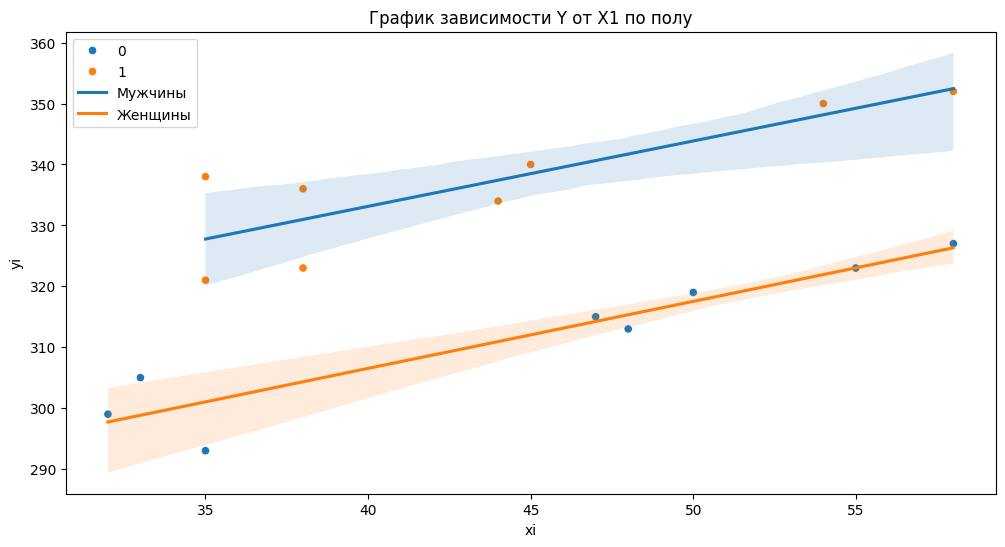

In [50]:
plt.figure(figsize=(12, 6))

# Подготовка данных для графика
sns.scatterplot(x='xi', y='yi', hue='пол', data=data)

# Линейная регрессия для мужчин
sns.regplot(x='xi', y='yi', data=data[data["пол"]==1], scatter=False, label="Мужчины")

# Линейная регрессия для женщин
sns.regplot(x='xi', y='yi', data=data[data["пол"]==0], scatter=False, label="Женщины")

plt.title("График зависимости Y от X1 по полу")
plt.legend()
plt.show()

### 4. С помощью теста Г. Чоу для уровня значимости a=0,05 проверить, являются ли выборки для юношей и девушек однородными в регрессионном смысле и можно ли их объединить.

In [53]:
from statsmodels.stats.api import anova_lm

# Объединяем обе выборки обратно в общий DataFrame
combined_df = pd.concat([data[data["пол"]==1], data[data["пол"]==0]], ignore_index=True)

# Добавляем фиктивную переменную для пола
combined_df['dummy'] = combined_df['пол'].map({0: 0, 1: 1})

# Строим объединённую модель с фиктивной переменной
full_model = ols('yi ~ xi + dummy', data=combined_df).fit()

# Строим ограниченную модель без учета пола
restricted_model = ols('yi ~ xi', data=combined_df).fit()

# Выполняем тест Г. Чоу
chow_test_result = anova_lm(restricted_model, full_model)

# Выводим результат теста Г. Чоу
print(f"Тест Г. Чоу:\n{chow_test_result}")

# Проверяем значимость теста Г. Чоу
if chow_test_result["Pr(>F)"][0] > 0.05:
    print("Выборки однородны в регрессионном смысле, их можно объединить.")
else:
    print("Выборки неоднородны в регрессионном смысле, их нельзя объединить.")

Тест Г. Чоу:
   df_resid          ssr  df_diff      ss_diff          F        Pr(>F)
0      14.0  3161.506151      0.0          NaN        NaN           NaN
1      13.0   370.019691      1.0  2791.486459  98.074034  2.013895e-07
Выборки неоднородны в регрессионном смысле, их нельзя объединить.
